In [21]:
pip install matplotlib


Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


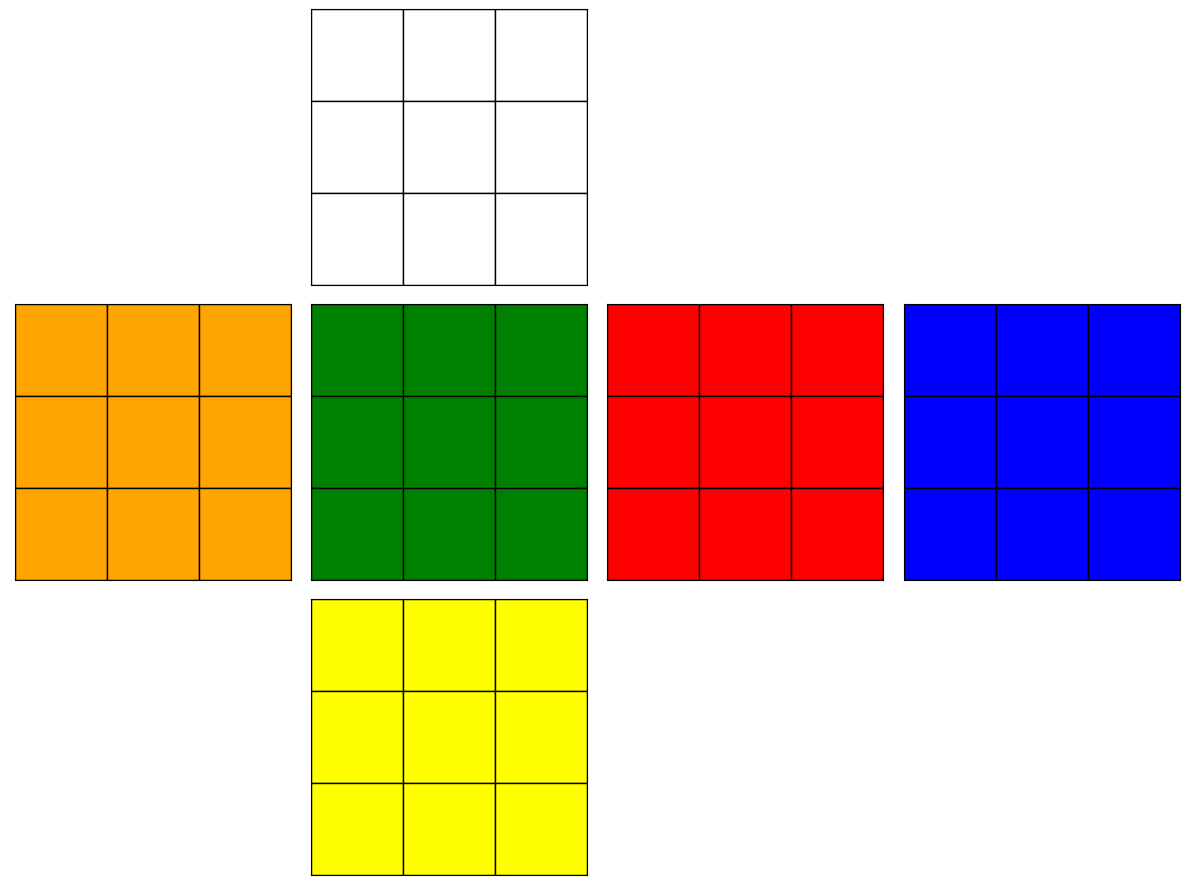

In [22]:
import matplotlib.pyplot as plt
import numpy as np

# Mapping from cube colors to RGB
color_map = {
    'W': 'white',
    'G': 'green',
    'R': 'red',
    'B': 'blue',
    'O': 'orange',
    'Y': 'yellow'
}

# Ask the user for the colors on each face
def get_cube_configuration():
    configuration = {}
    faces = ['U', 'L', 'F', 'R', 'B', 'D']
    print("Enter the colors for each face of the Rubik's cube using W, G, R, B, O, Y for White, Green, Red, Blue, Orange, Yellow respectively.")
    for face in faces:
        print(f"Enter the colors for the {face} face, row by row, without spaces:")
        face_colors = []
        for i in range(3):
            while True:
                row = input(f"Enter row {i+1} for the {face} face: ").strip().upper()
                if len(row) == 3 and all(c in 'WGRBOY' for c in row):
                    face_colors.append(list(row))
                    break
                else:
                    print("Invalid input. Make sure to enter exactly three characters from 'WGRBOY' for each row.")
        configuration[face] = np.array(face_colors)
    return configuration

# Function to plot one face of the cube
def plot_face(ax, face_colors, row, col):
    ax[row, col].axis('on')
    for i in range(3):
        for j in range(3):
            rect = plt.Rectangle((j, 2 - i), 1, 1, facecolor=color_map[face_colors[i, j]], edgecolor='black')
            ax[row, col].add_patch(rect)
    ax[row, col].set_xlim(0, 3)
    ax[row, col].set_ylim(0, 3)
    ax[row, col].set_xticks([])
    ax[row, col].set_yticks([])
    ax[row, col].set_aspect('equal')

def plot_cube(cube_configuration):
    fig, ax = plt.subplots(3, 4, figsize=(12, 9))  # Create a 3x4 grid of plots

    # Hide all axes, they are not needed
    for axis in ax.flatten():
        axis.axis('off')
    # Plot the 6 faces of the cube
    plot_face(ax, cube_configuration['U'], 0, 1)  # Up
    plot_face(ax, cube_configuration['L'], 1, 0)  # Left
    plot_face(ax, cube_configuration['F'], 1, 1)  # Front
    plot_face(ax, cube_configuration['R'], 1, 2)  # Right
    plot_face(ax, cube_configuration['B'], 1, 3)  # Back
    plot_face(ax, cube_configuration['D'], 2, 1)  # Down

    plt.tight_layout()
    plt.show()
    plt.close()

cube_configuration = {
    'U': np.array([['W', 'W', 'W'], ['W', 'W', 'W'], ['W', 'W', 'W']]),  # Up
    'L': np.array([['O', 'O', 'O'], ['O', 'O', 'O'], ['O', 'O', 'O']]),  # Left
    'F': np.array([['G', 'G', 'G'], ['G', 'G', 'G'], ['G', 'G', 'G']]),  # Front
    'R': np.array([['R', 'R', 'R'], ['R', 'R', 'R'], ['R', 'R', 'R']]),  # Right
    'B': np.array([['B', 'B', 'B'], ['B', 'B', 'B'], ['B', 'B', 'B']]),  # Back
    'D': np.array([['Y', 'Y', 'Y'], ['Y', 'Y', 'Y'], ['Y', 'Y', 'Y']])   # Down
}

# cube_configuration = get_cube_configuration()

plot_cube(cube_configuration)



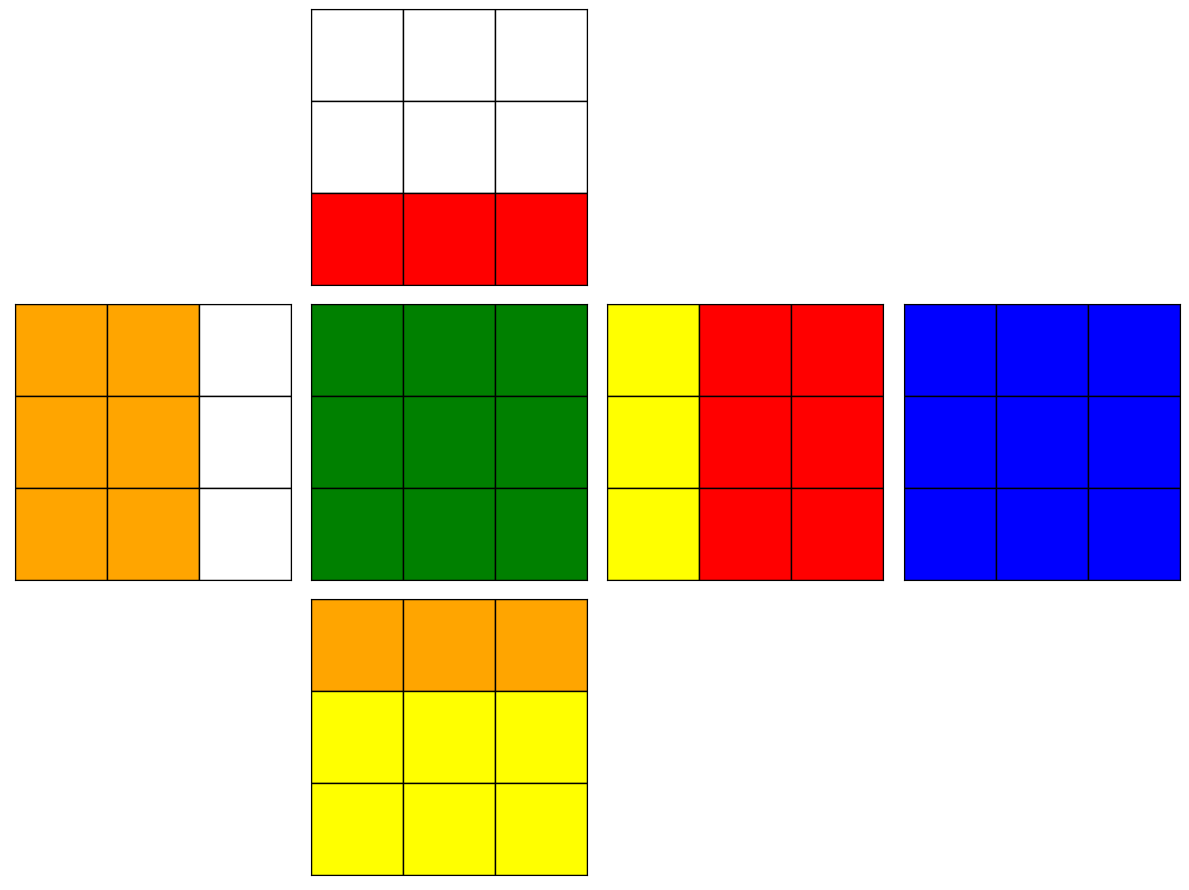

In [23]:
def rotate_face(cube_configuration, face, clockwise=True):
    neighbors = {
        # Face: [neighbor1, neighbor2, neighbor3, neighbor4]
        'U': ['B', 'R', 'F', 'L'],
        'L': ['U', 'F', 'D', 'B'],
        'F': ['U', 'R', 'D', 'L'],
        'R': ['U', 'B', 'D', 'F'],
        'B': ['U', 'L', 'D', 'R'],
        'D': ['F', 'R', 'B', 'L']
    }
    # Rotate the face itself
    if clockwise:
        cube_configuration[face] = np.rot90(cube_configuration[face])
    
        # Saves in a temporary variable the colors of the last column of neighbors4
        temp = ['', '', '']
        for i in range(3):
            temp[i] = cube_configuration[neighbors[face][3]][i, 2]

        # Puts the color of the first row of neighbors3 in the last column of neighbors4
        for i in range(3):
            cube_configuration[neighbors[face][3]][i, 2] = cube_configuration[neighbors[face][2]][0, i]

        # Puts the color of the first column of neighbors2 in the first row of neighbors3
        for i in range(3):
            cube_configuration[neighbors[face][2]][0, i] = cube_configuration[neighbors[face][1]][i, 0]

        # Puts the color of the last row of neighbors1 in the first column of neighbors2
        for i in range(3):
            cube_configuration[neighbors[face][1]][i, 0] = cube_configuration[neighbors[face][0]][2, i]

        # Puts the color of the first column of neighbors4 in the last row of neighbors1
        for i in range(3):
            cube_configuration[neighbors[face][0]][2, i] = temp[i]
    else:
        cube_configuration[face] = np.rot90(cube_configuration[face])

        # Saves in a temporary variable the colors of the last column of neighbors4
        temp = ['', '', '']
        for i in range(3):
            temp[i] = cube_configuration[neighbors[face][3]][i, 2]

        # Puts the color of the last row of neighbors1 in the last column of neighbors4
        for i in range(3):
            cube_configuration[neighbors[face][3]][i, 2] = cube_configuration[neighbors[face][0]][2, i]

        # Puts the color of the first column of neighbors2 in the last row of neighbors1
        for i in range(3):
            cube_configuration[neighbors[face][0]][2, i] = cube_configuration[neighbors[face][1]][i, 0]

        # Puts the color of the first row of neighbors3 in the first column of neighbors2
        for i in range(3):
            cube_configuration[neighbors[face][1]][i, 0] = cube_configuration[neighbors[face][2]][0, i]

        # Puts the color of the last column of neighbors4 in the first row of neighbors3
        for i in range(3):
            cube_configuration[neighbors[face][2]][0, i] = temp[i]
    
    return cube_configuration


cube_configuration = rotate_face(cube_configuration, 'F', clockwise=False)
plot_cube(cube_configuration)
        

In [24]:
# The heuristic function for the A* algorithm could be the number of misplaced tiles.
# This function will take the current state of the Rubik's Cube and compare it to the solved state.

# Defining a solved state for the Rubik's Cube
solved_state = {
    'U': np.full((3, 3), 'W'),  # Upper face is all white
    'L': np.full((3, 3), 'O'),  # Left face is all orange
    'F': np.full((3, 3), 'G'),  # Front face is all green
    'R': np.full((3, 3), 'R'),  # Right face is all red
    'B': np.full((3, 3), 'B'),  # Back face is all blue
    'D': np.full((3, 3), 'Y')   # Down face is all yellow
}

def heuristic_misplaced_tiles(cube_state, solved_state):
    """
    Calculate the number of misplaced tiles in the Rubik's Cube.

    :param cube_state: Current state of the Rubik's Cube
    :param solved_state: Solved state of the Rubik's Cube
    :return: Number of misplaced tiles
    """
    misplaced_tiles = 0
    for face in cube_state:
        misplaced_tiles += np.sum(cube_state[face] != solved_state[face])
    return misplaced_tiles

print(heuristic_misplaced_tiles(cube_configuration, solved_state))

12


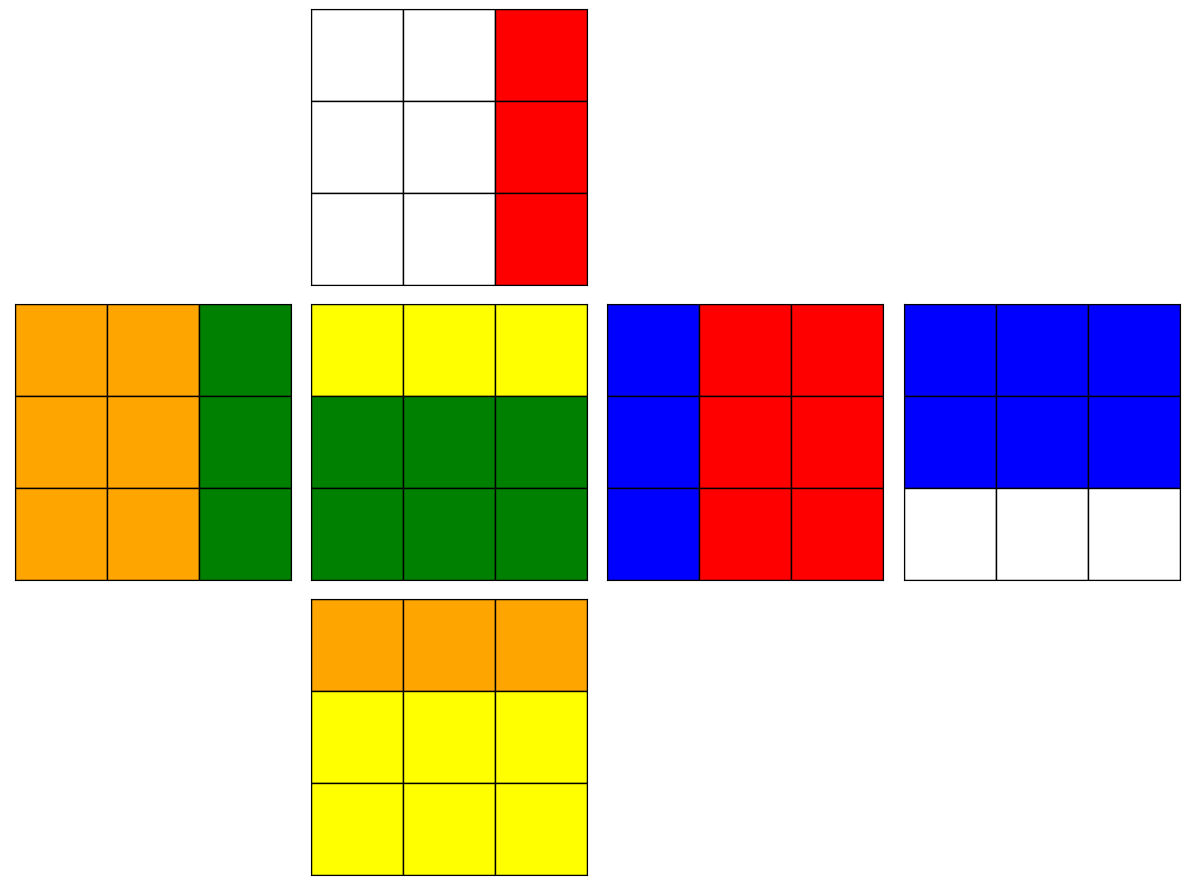

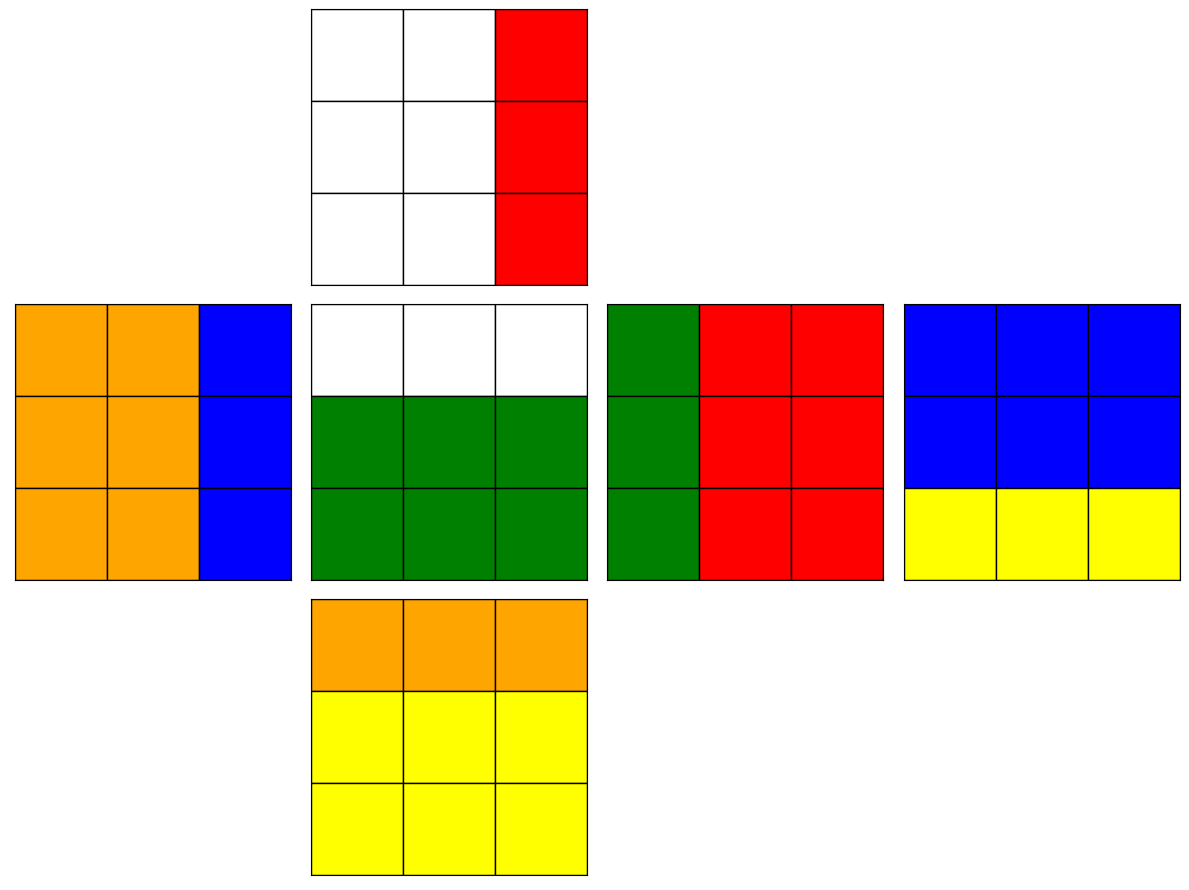

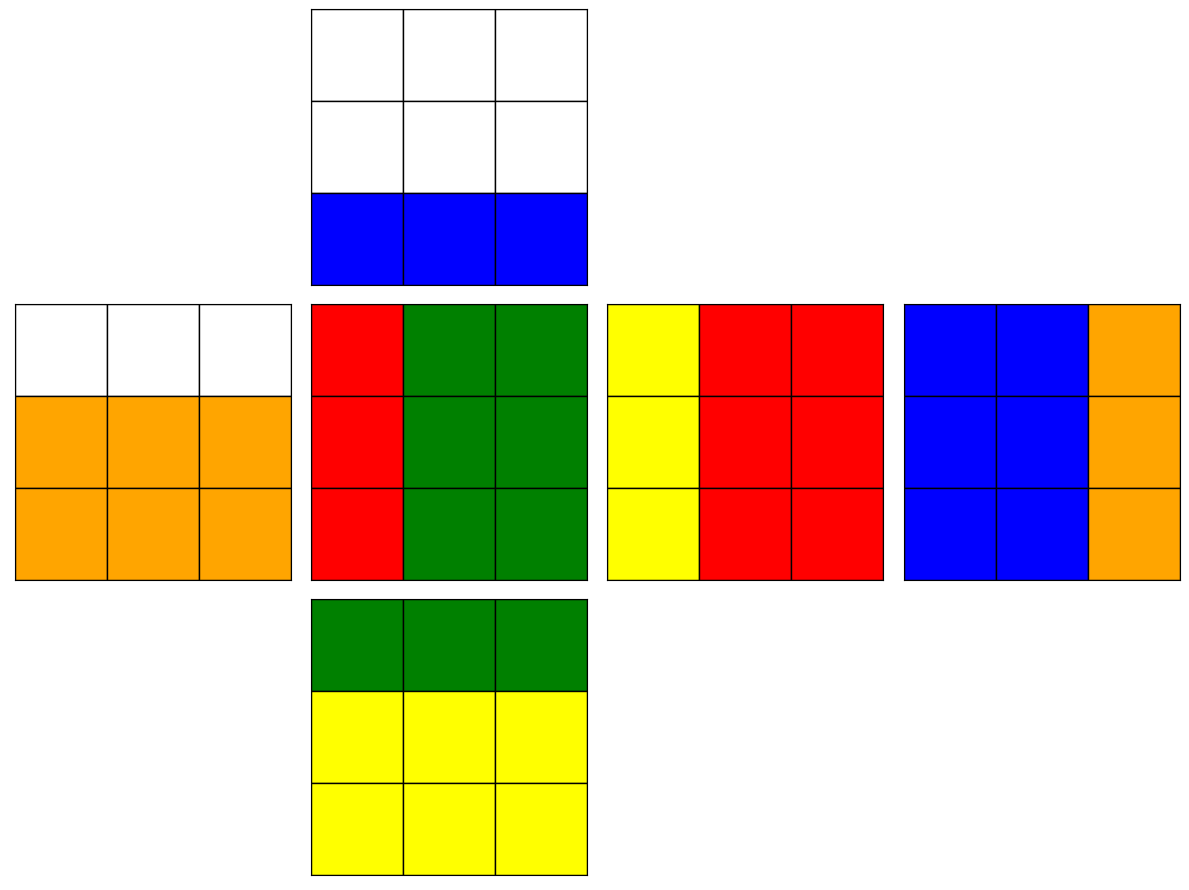

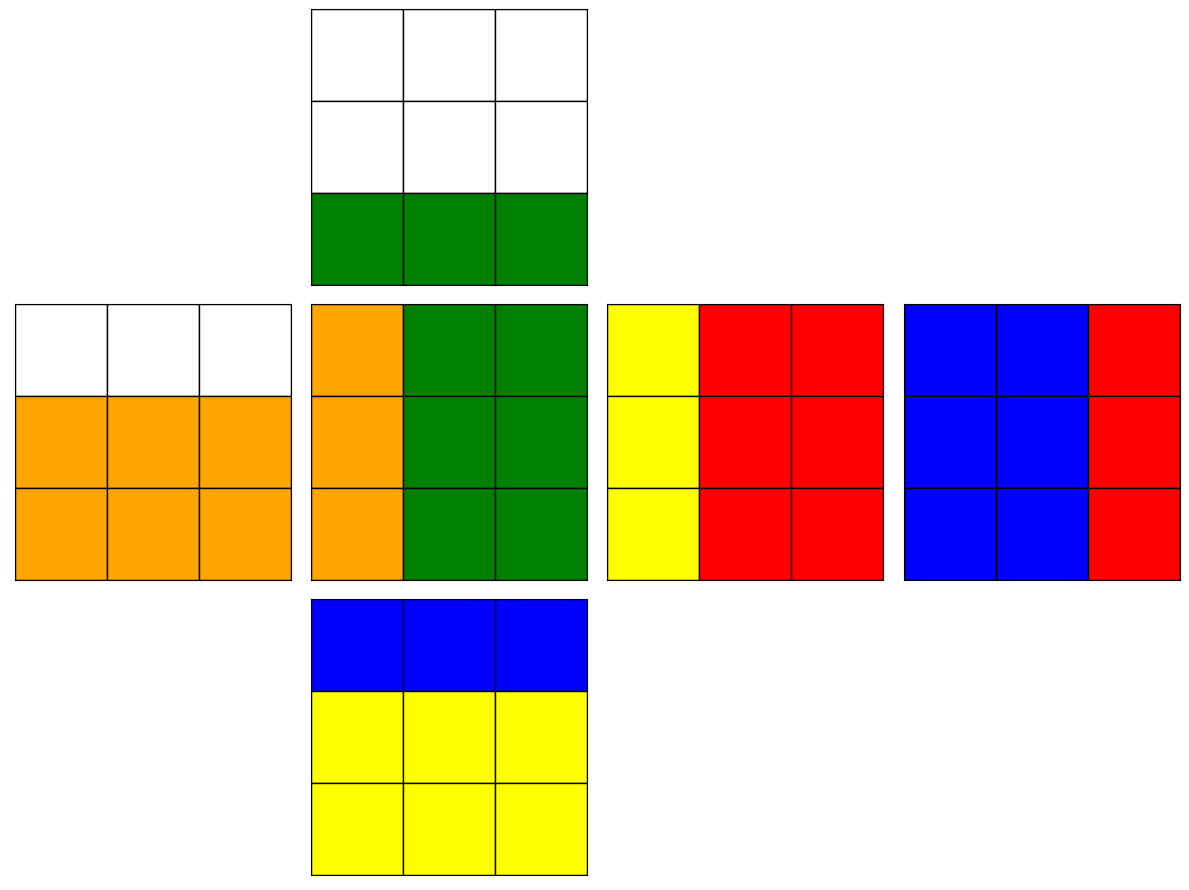

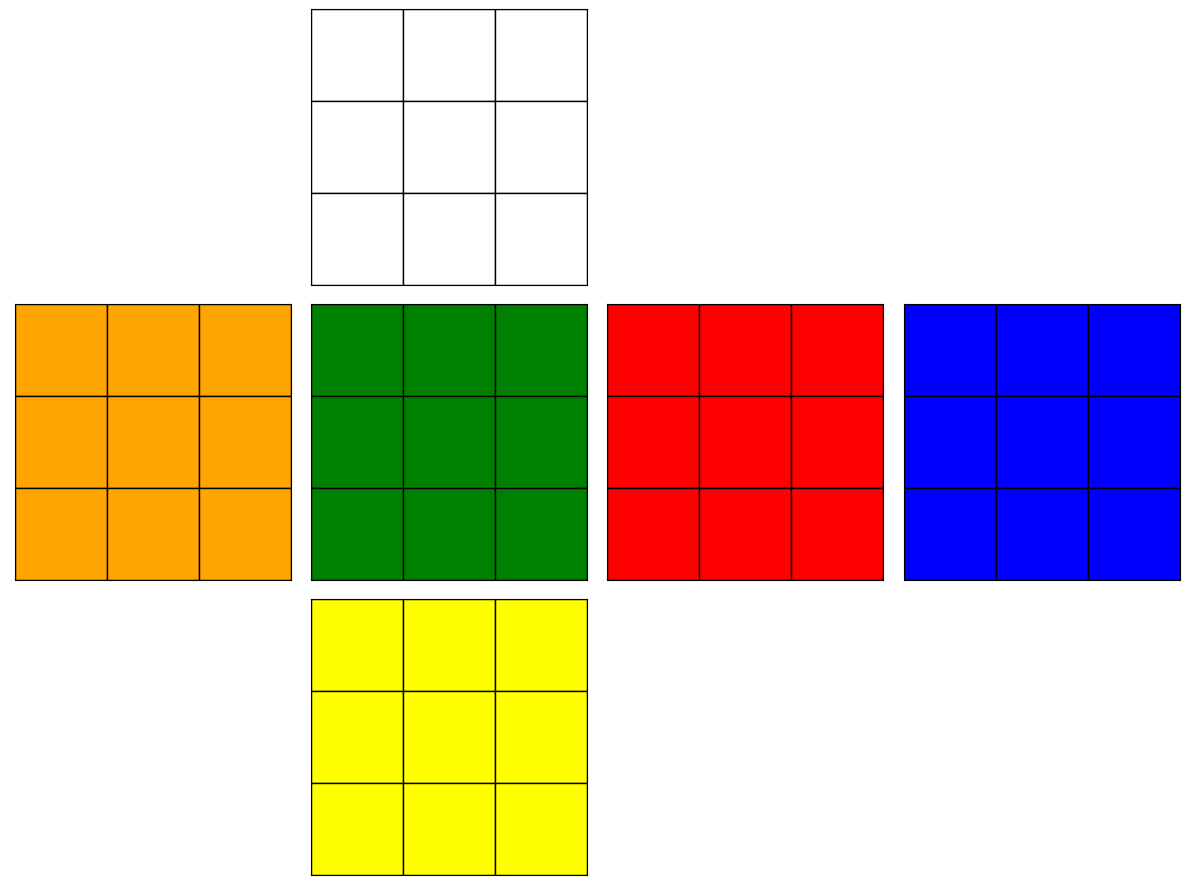

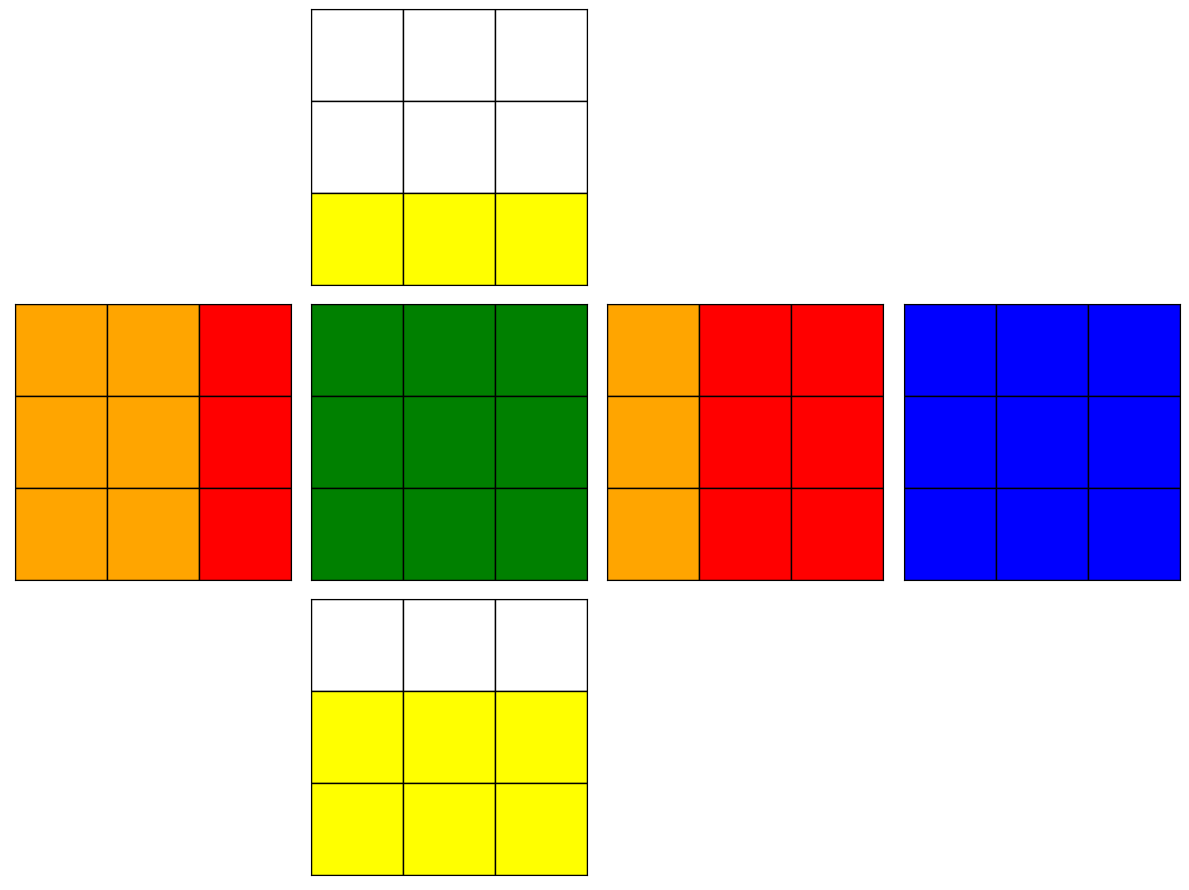

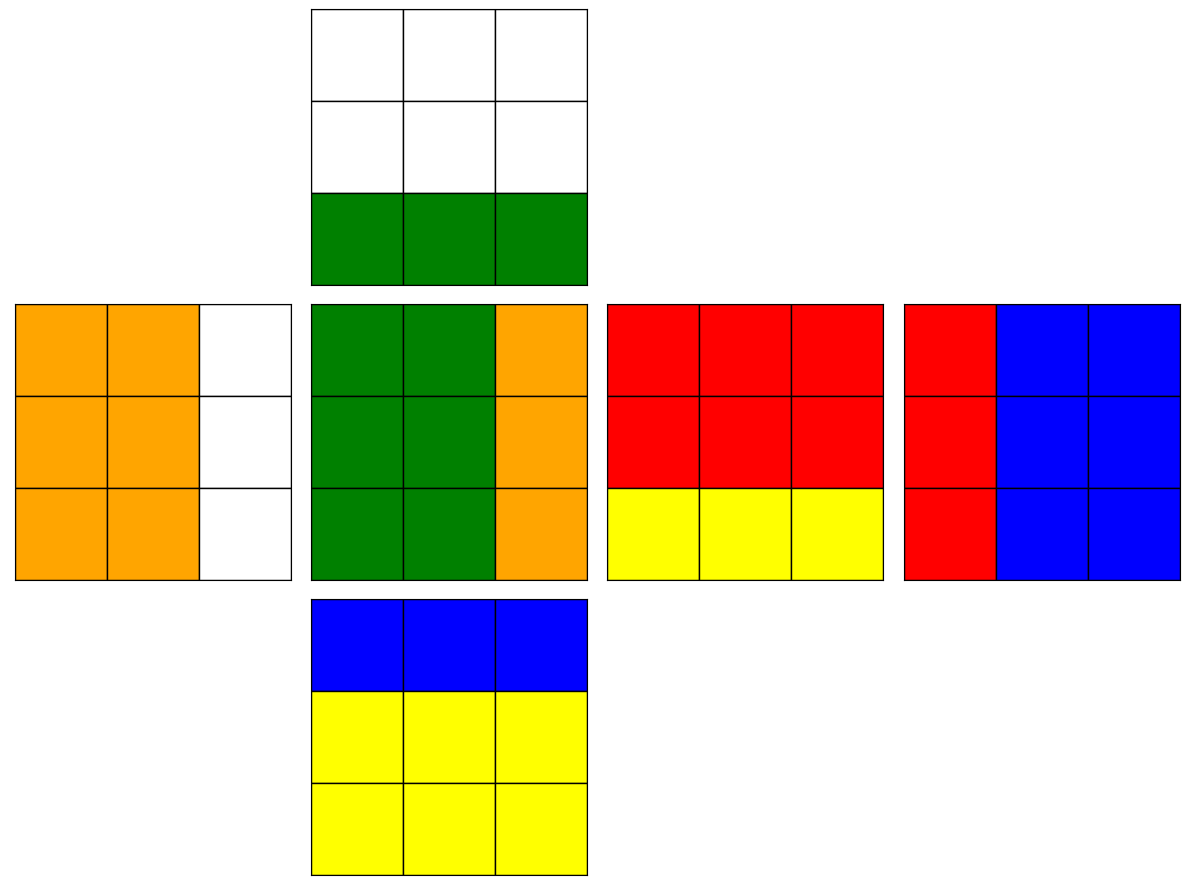

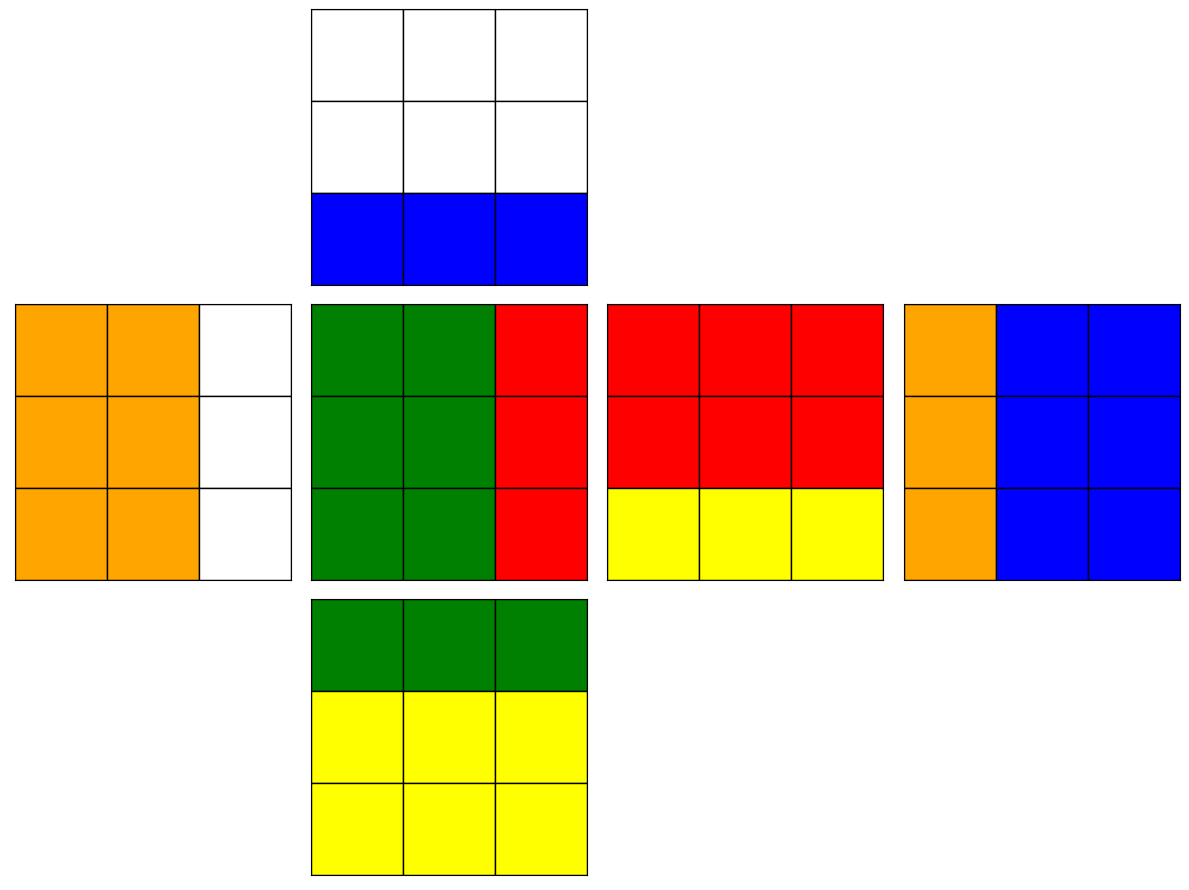

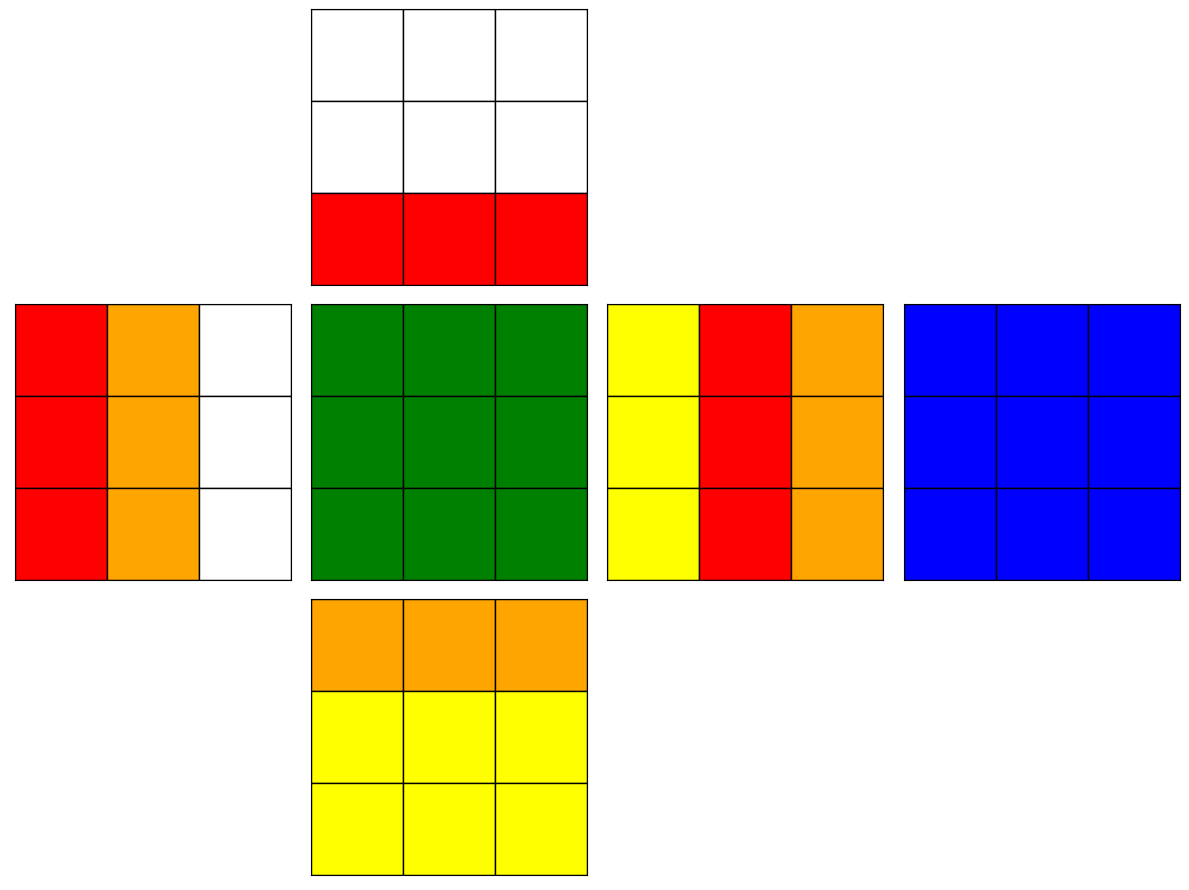

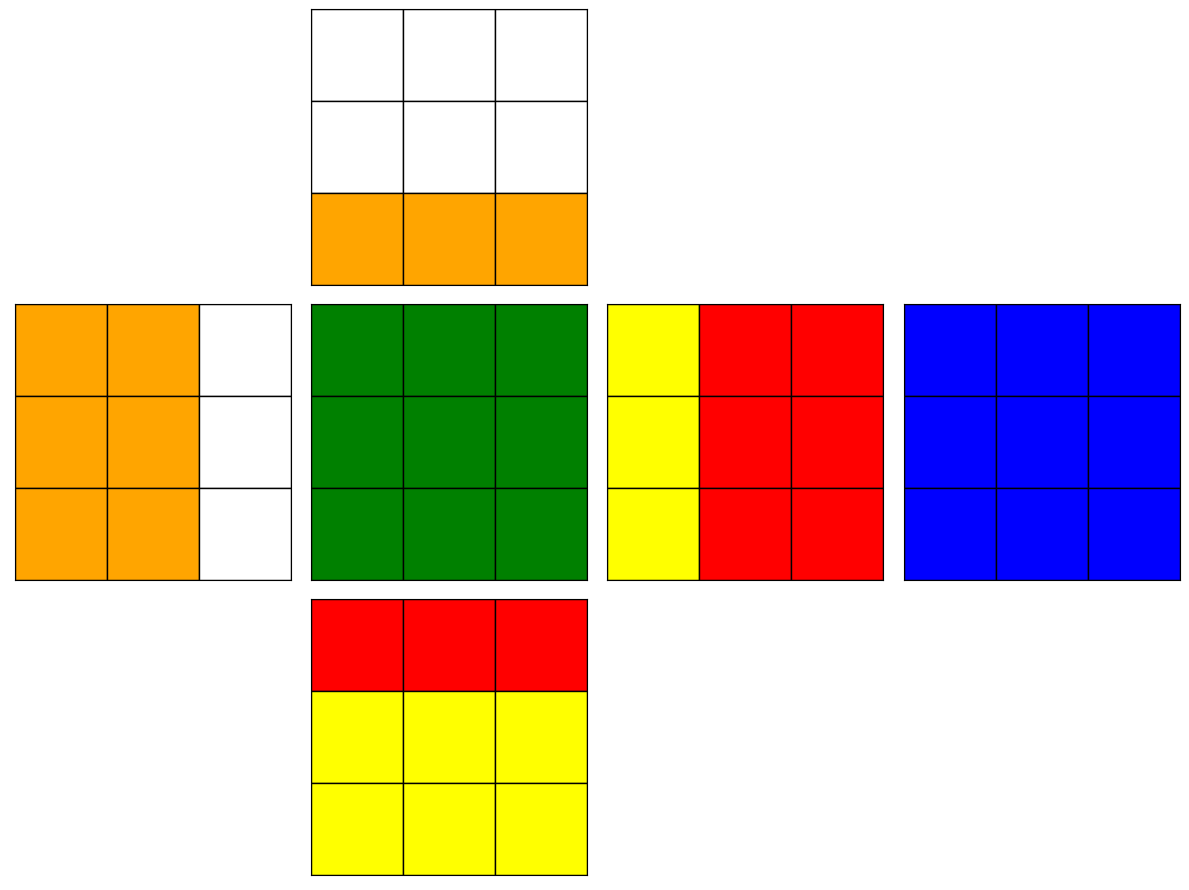

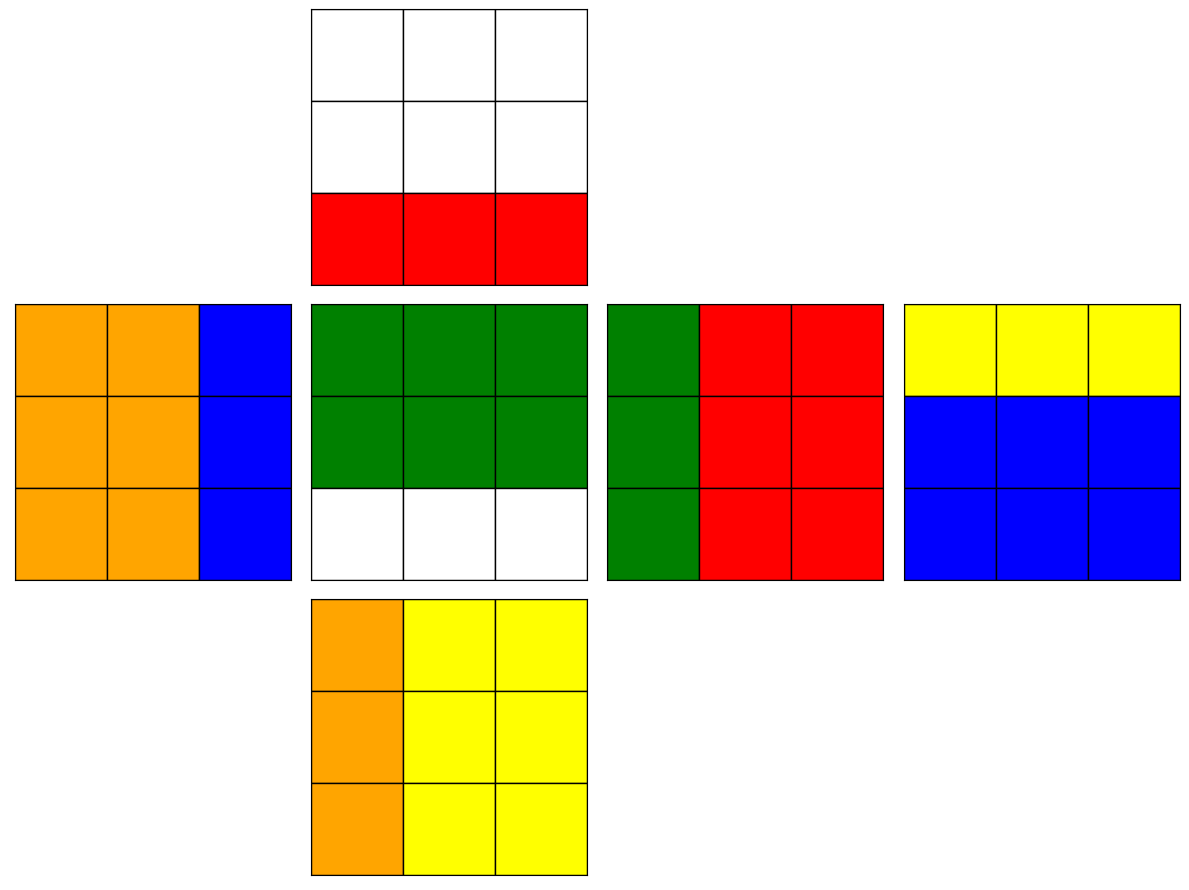

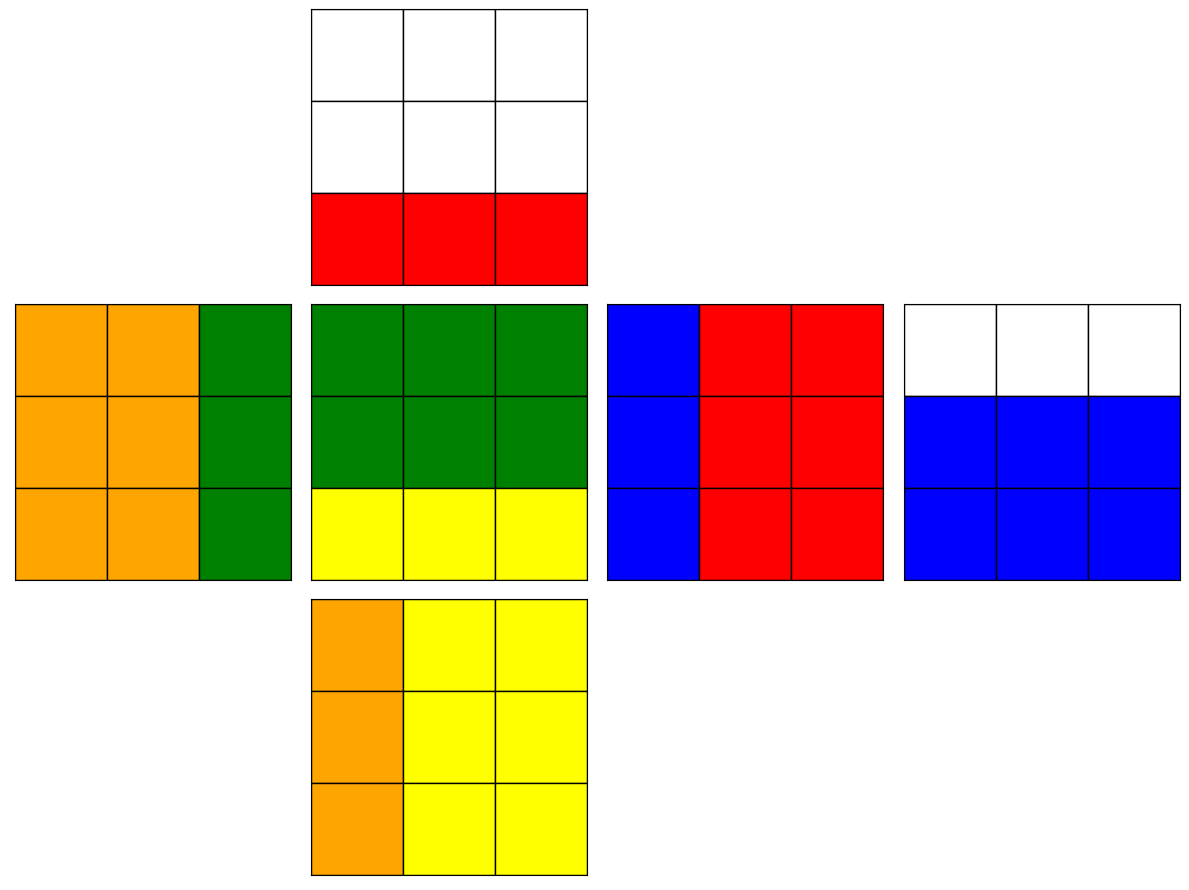

In [25]:
# Implementing the 'generate_next_states' function for the A* search algorithm
def generate_next_states(cube_state):
    """
    Generate all possible next states from the current state of the Rubik's Cube.

    :param cube_state: Current state of the Rubik's Cube
    :return: List of tuples containing the next state and the move performed
    """
    # List of all possible faces that can be rotated
    faces = ['U', 'L', 'F', 'R', 'B', 'D']
    next_states = []

    # Function to copy the cube's state
    def copy_state(state):
        return {face: np.copy(state[face]) for face in state}

    # Rotating each face in both clockwise and counterclockwise directions
    for face in faces:
        # Clockwise rotation
        next_state_cw = copy_state(cube_state)
        rotate_face(next_state_cw, face, clockwise=True)
        next_states.append((next_state_cw, f'{face} Clockwise'))

        # Counterclockwise rotation
        next_state_ccw = copy_state(cube_state)
        rotate_face(next_state_ccw, face, clockwise=False)
        next_states.append((next_state_ccw, f'{face} Counterclockwise'))

    return next_states

for state in generate_next_states(cube_configuration):
    plot_cube(state[0])

F Clockwise


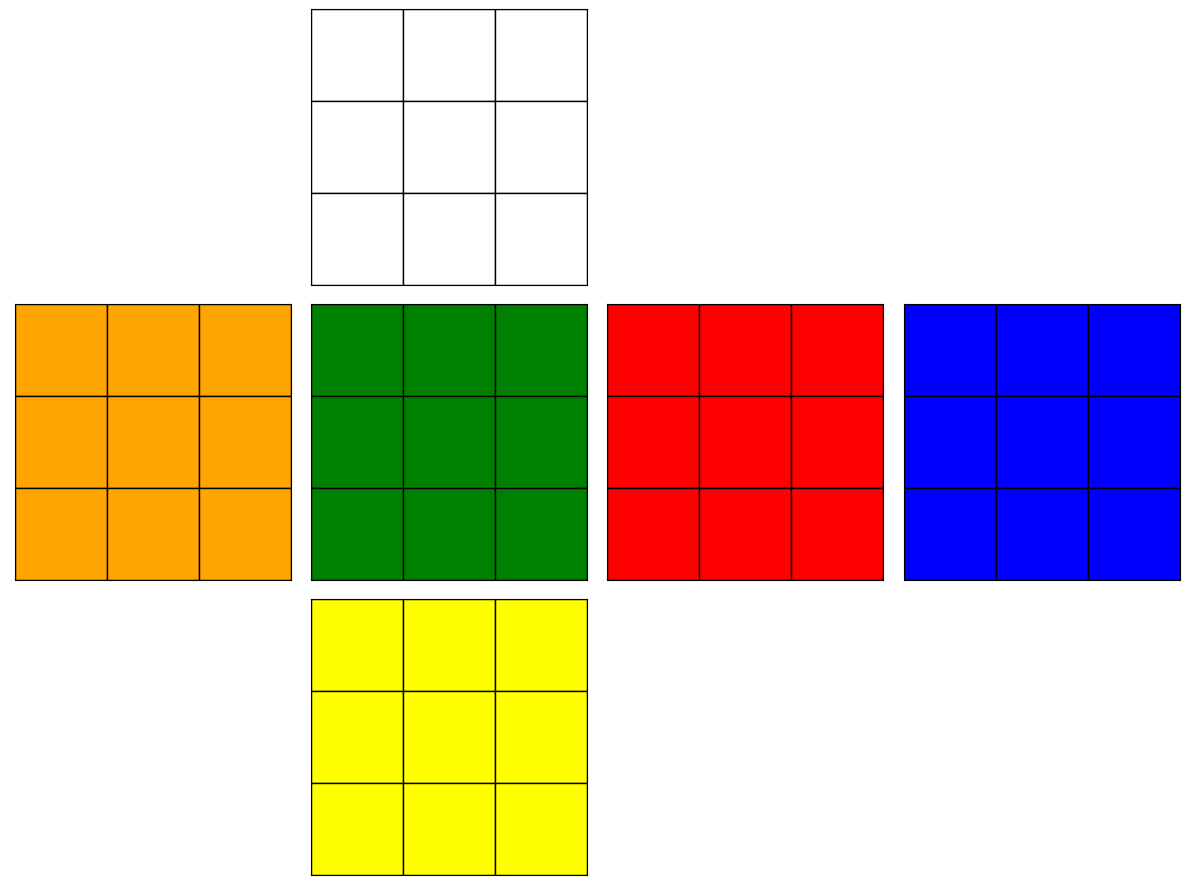

In [26]:
# Next, we need to implement the A* search algorithm.
# This algorithm will require a priority queue to manage the states based on their heuristic values.
# We also need to define the solved state of the Rubik's Cube for the heuristic calculation.

# A* search algorithm implementation
def a_star_search(start_state, goal_state):
    """
    A* search algorithm to solve the Rubik's Cube.

    :param start_state: Starting state of the Rubik's Cube
    :param goal_state: Goal state (solved state) of the Rubik's Cube
    :return: Steps to solve the Rubik's Cube
    """

    # Priority queue for states to explore, formatted as (cost, state, path)
    # Cost is the sum of the path length and the heuristic value
    open_set = []

    # Starting state with an empty path and cost based on the heuristic alone
    # heapq.heappush(open_set, (heuristic_misplaced_tiles(start_state, goal_state), start_state, []))
    open_set.append((heuristic_misplaced_tiles(start_state, goal_state), start_state, []))

    # Set to keep track of visited states
    visited = set()

    while open_set:
        # Get the state with the lowest cost
        # cost, current_state, path = heapq.heappop(open_set)
        open_set.sort(key=lambda x: x[0])
        cost, current_state, path = open_set.pop(0)

        # Check if we have reached the goal
        if all(np.array_equal(current_state[face], goal_state[face]) for face in current_state):
            return path

        # If this state has already been visited, skip it
        if str(current_state) in visited:
            continue

        # Mark this state as visited
        visited.add(str(current_state))

        # Generate and explore next states
        for next_state, move in generate_next_states(current_state):
            if str(next_state) not in visited:
                new_cost = cost + 1  # Increment path length
                new_path = path + [move]
                # heapq.heappush(open_set, (new_cost + heuristic_misplaced_tiles(next_state, goal_state), next_state, new_path))
                open_set.append((new_cost + heuristic_misplaced_tiles(next_state, goal_state), next_state, new_path))

    return None  # Return None if no solution is found

solution_path = a_star_search(cube_configuration, solved_state)

plot_cube(cube_configuration)

for move in solution_path:
    print(move)
    cube_configuration = rotate_face(cube_configuration, move.split()[0], clockwise=('Clockwise' in move))
    plot_cube(cube_configuration)
